In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import math
from imblearn.over_sampling import SMOTE
smote = SMOTE()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [41]:
credit_card_df= pd.read_csv('data/dataCC.csv')
credit_card_df

,ID,STATUS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,dmy_F,dmy_M,dmy_N,dmy_Y,...,dmy_Low-skill Laborers,dmy_Managers,dmy_Medicine staff,dmy_Other,dmy_Private service staff,dmy_Realty agents,dmy_Sales staff,dmy_Secretaries,dmy_Security staff,dmy_Waiters/barmen staff
0,5008804,0,427500.0,33,12,2,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,5008804,1,427500.0,33,12,2,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,5008804,0,427500.0,33,12,2,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,5008805,1,427500.0,33,12,2,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,5008805,0,427500.0,33,12,2,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400060,5150487,0,202500.0,53,6,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
400061,5150487,0,202500.0,53,6,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
400062,5150487,0,202500.0,53,6,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
400063,5150487,0,202500.0,53,6,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
credit_card_df.set_index('ID', inplace=True)
credit_card_df

,STATUS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,dmy_F,dmy_M,dmy_N,dmy_Y,dmy_N.1,...,dmy_Low-skill Laborers,dmy_Managers,dmy_Medicine staff,dmy_Other,dmy_Private service staff,dmy_Realty agents,dmy_Sales staff,dmy_Secretaries,dmy_Security staff,dmy_Waiters/barmen staff
ID,,,,,,,,,,,,,,,,,,,,,
5008804,0,427500.0,33,12,2,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5008804,1,427500.0,33,12,2,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5008804,0,427500.0,33,12,2,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5008805,1,427500.0,33,12,2,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5008805,0,427500.0,33,12,2,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150487,0,202500.0,53,6,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5150487,0,202500.0,53,6,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5150487,0,202500.0,53,6,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y_col = 'STATUS'
y = credit_card_df[y_col]
x = credit_card_df[credit_card_df.columns.drop(y_col)]

,Error_metric,Train,Test
0,Accuracy,0.981089,0.980953
1,Precision,0.691057,0.629310
2,Recall,0.031540,0.031520


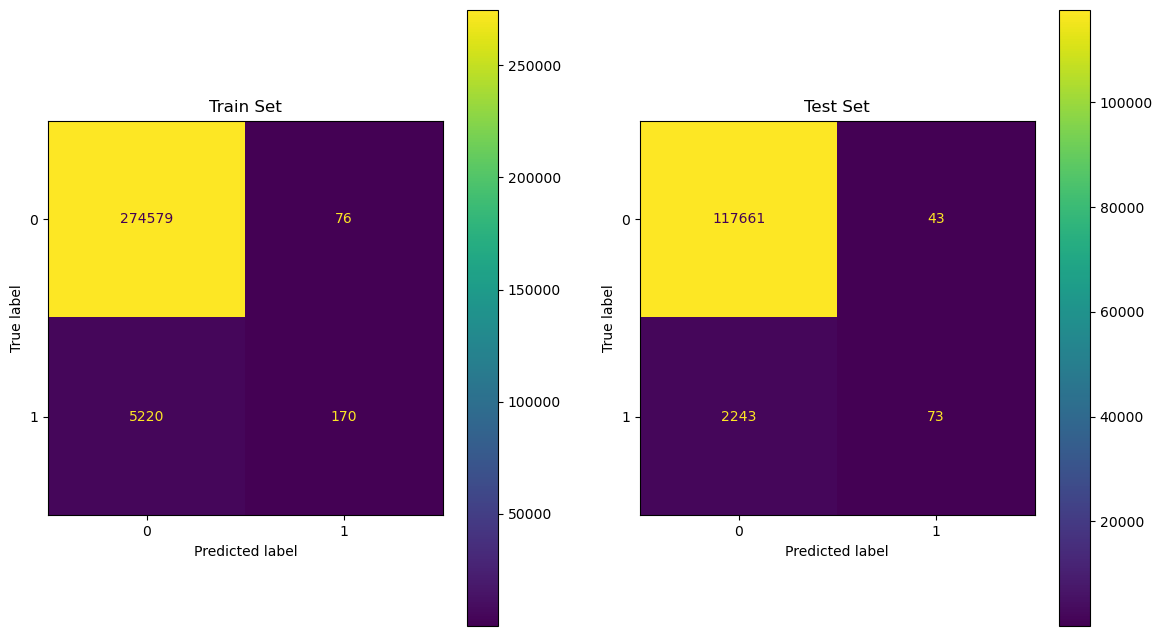

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=8)

model.fit(x_train, y_train)

y_pred_train_dt = model.predict(x_train)
y_pred_test_dt = model.predict(x_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,x_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,x_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [45]:
Y_col = 'STATUS'
Y = credit_card_df[Y_col]
X = credit_card_df[credit_card_df.columns.drop(Y_col)]

In [46]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=.30,random_state=11)

In [47]:
X_train.shape

(280045, 49)

In [48]:
Y_train.shape

(280045,)

In [49]:
X_test.shape

(120020, 49)

In [50]:
smote = SMOTE()
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [51]:
Y_train.value_counts()

0    274676
1    274676
Name: STATUS, dtype: int64

,Error_metric,Train,Test
0,Accuracy,0.762071,0.793059
1,Precision,0.782473,0.050396
2,Recall,0.725957,0.539581


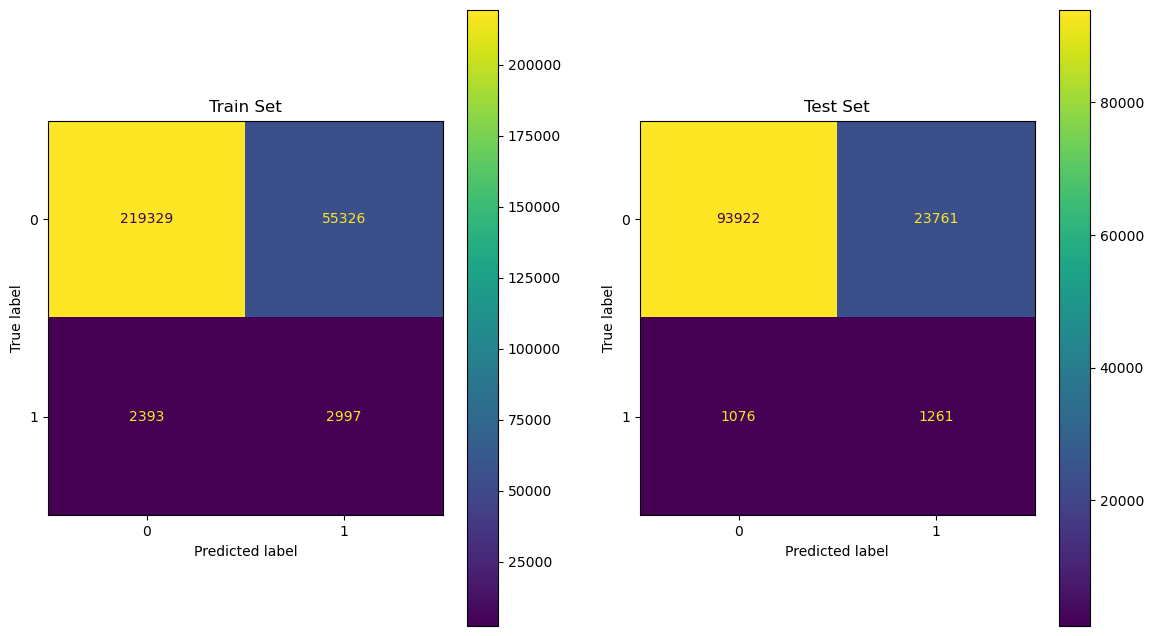

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=10)

model.fit(X_train, Y_train)

Y_pred_train_dt = model.predict(X_train)
Y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(Y_train, Y_pred_train_dt),
                                         precision_score(Y_train, Y_pred_train_dt),
                                         recall_score(Y_train, Y_pred_train_dt)],
                               'Test': [accuracy_score(Y_test, Y_pred_test_dt),
                                        precision_score(Y_test, Y_pred_test_dt),
                                        recall_score(Y_test, Y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,x_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,Y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")